In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualisation library
import seaborn as sns
import matplotlib.pyplot as plt

# classifier


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Data, and created dataset

we have got three csv. One for the training data set and 2 for the test dataset.

During the exploration of the data we want just on dataset with all the data 

In [52]:
# Importation of data from CSV


#df_result = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
#df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
#df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
#df_train.shape

df_result = pd.read_csv('gender_submission.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print("train dataset size : ", df_train.shape)
print("test dataset size : ", df_test.shape)

train dataset size :  (891, 12)
test dataset size :  (418, 11)


In [53]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(df):
    # Returns divided dfs of training and test set
    test = df.loc[df['dataset'] == 'test'].drop(['Survived'], axis=1)
    train = df.loc[df['dataset'] == 'train']
    # all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)
    return train, test


# adding survived informations on df_test
#df_test = df_test.join(df_result.set_index('PassengerId'), on='PassengerId')

# adding test /train information
df_test['dataset'] = 'test'
df_train['dataset'] = 'train'

# will be used for analysis
df_all = concat_df(df_train, df_test)
#df_train, df_test = divide_df(df_all)

df_train.name = 'Training dataset'
df_test.name = 'Test dataset'
df_all.name = 'All dataset' 

dfs = [df_train, df_test]

print('Number of Training Examples : {}'.format(df_train.shape[0]))
print('Number of Test Examples : {}\n'.format(df_test.shape[0]))

print('Training X Shape : {}'.format(df_train.shape))
print('Training y Shape : {}\n'.format(df_train['Survived'].shape[0]))

print('Test X Shape : {}'.format(df_test.shape))

print(df_train.columns)
print(df_test.columns)

df_all.head()

Number of Training Examples : 891
Number of Test Examples : 418

Training X Shape : (891, 13)
Training y Shape : 891

Test X Shape : (418, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'dataset'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'dataset'],
      dtype='object')


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,dataset
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train


# Global Exploration of the dataset


### Variable target : 
- Survival : 	0 = No, 1 = Yes

### Other variables :
- pclass : 	Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex : mal / female	
- Age :	Age in years	
- sibsp : # of siblings / spouses aboard the Titanic	
- parch	: # of parents / children aboard the Titanic	
- ticket : Ticket number	
- fare : Passenger fare	
- cabin : Cabin number	
- embarked : Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
- PassengerId : Id of the passenger
- name : name of the passenger

### Rows and columns 
- in train dataset : 891, 12
- in test dataset : 418, 11 (suvived is in another vecter)
- in all data dataset : 1309, 13

### Types of variables : 
- object : 5, float & int : 7

### Nan values :
it has very few null values, just 19% of unfilled ages

### Duplicated :
there is no duplicated

### Outliers : 
there is no outliers

In [54]:
# observation of the first lines of the dataset
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,dataset
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train


In [55]:
# Check Dtype and non null -> Age as just 714 non_null values
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
 12  dataset      1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [56]:
# mean age is 29years old and meduim age is 28 years old 
# -> maybe gaussian distribution
# no outliers 

df_all.describe()
# df_test.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [57]:
# There is no duplicated in train and in test dataset
df_all.duplicated().value_counts()

False    1309
dtype: int64

All columns : ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'dataset']
Float & Int columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Object columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'dataset']


<AxesSubplot:ylabel='None'>

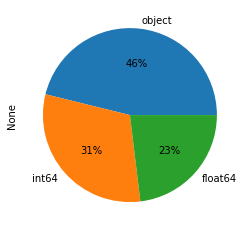

In [58]:
# chech columns by type

columns = list(df_train.columns)
columns_float = list(df_train.select_dtypes(['float', 'int']).columns)
columns_object = list(df_train.select_dtypes(['object']).columns)

print("All columns :", columns)
print("Float & Int columns :", columns_float)
print("Object columns :", columns_object)

df_all.dtypes.value_counts().plot.pie(autopct='%.0f%%')

### NaN Analysis

just in three columns : Age / Cabin & Embarked

<AxesSubplot:>

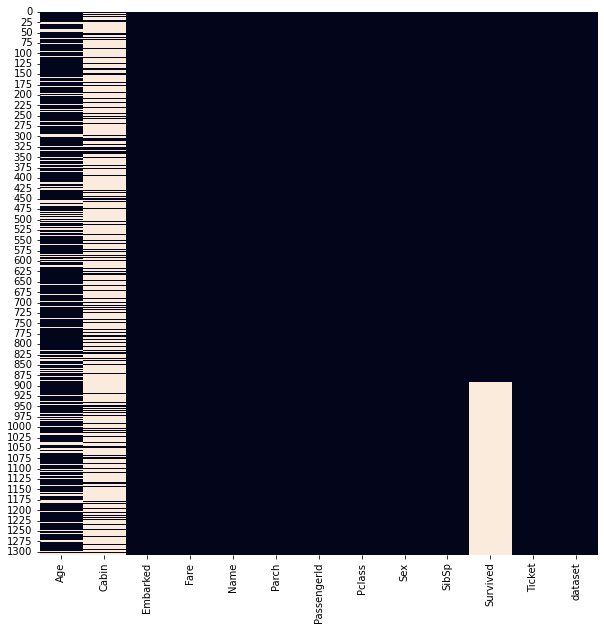

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(df_all.isna(), cbar=False)

In [60]:
(df_all.isna().sum()).sort_values(ascending=True)

Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
dataset           0
Fare              1
Embarked          2
Age             263
Survived        418
Cabin          1014
dtype: int64

In [61]:
# Age
# Missing values in Age are filled with median age, but using median age of the whole data set is not a good choice. 
# Median age of Pclass groups is the best choice because of its high correlation with Age (0.408106)

# Correlation of all features with all other features
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", 
                                                        ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 
                            0: 'Correlation Coefficient'}, inplace=True)
print(df_all_corr[df_all_corr['Feature 1'] == 'Age'])

# Apply separately to train and test set to avoid leakage
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

   Feature 1    Feature 2  Correlation Coefficient
0        Age          Age                 1.000000
9        Age       Pclass                 0.408106
18       Age        SibSp                 0.243699
21       Age         Fare                 0.178740
26       Age        Parch                 0.150917
30       Age     Survived                 0.077221
41       Age  PassengerId                 0.028814


In [62]:
(df_all.isna().sum()).sort_values(ascending=True)

Age               0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
dataset           0
Fare              1
Embarked          2
Survived        418
Cabin          1014
dtype: int64

In [63]:
# to many missing values we drop this columns
df_all.drop(['Cabin'], axis=1, inplace=True)
df_all.shape

(1309, 12)

In [64]:
df_all.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [65]:
# just three missing values, we can drop there. But we can't we need to keep all the rows for the compétition
#df_all.dropna(axis=0, inplace=True)
#df_all.shape

print(df_all[df_all['Fare'].isnull()])
df_all['Fare'] = df_all.groupby(['Sex', 'Pclass'])['Fare'].apply(lambda x: x.fillna(x.median()))

print(df_all[df_all['Embarked'].isnull()])
df_all['Embarked'] = df_all['Embarked'].fillna('S')

       Age Embarked  Fare                Name  Parch  PassengerId  Pclass  \
1043  60.5        S   NaN  Storey, Mr. Thomas      0         1044       3   

       Sex  SibSp  Survived Ticket dataset  
1043  male      0       NaN   3701    test  
      Age Embarked  Fare                                       Name  Parch  \
61   38.0      NaN  80.0                        Icard, Miss. Amelie      0   
829  62.0      NaN  80.0  Stone, Mrs. George Nelson (Martha Evelyn)      0   

     PassengerId  Pclass     Sex  SibSp  Survived  Ticket dataset  
61            62       1  female      0       1.0  113572   train  
829          830       1  female      0       1.0  113572   train  


In [66]:
# News datas frames

df_train, df_test = divide_df(df_all)

df_train.name = 'Training dataset'
df_test.name = 'Test dataset'
df_all.name = 'All dataset' 

dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))

print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))

print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))

print(df_train.columns)
print(df_test.columns)

df_all.head()

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket', 'dataset'],
      dtype='object')
Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Ticket', 'dataset'],
      dtype='object')


,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,dataset
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train


In [67]:
(df_all.isna().sum()).sort_values(ascending=True)

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Ticket           0
dataset          0
Survived       418
dtype: int64

### Target Analysis

<AxesSubplot:ylabel='Survived'>

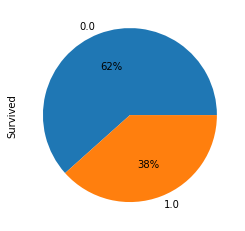

In [68]:
df_train, df_test = divide_df(df_all)
df_all['Survived'].value_counts().plot.pie(autopct='%.0f%%')

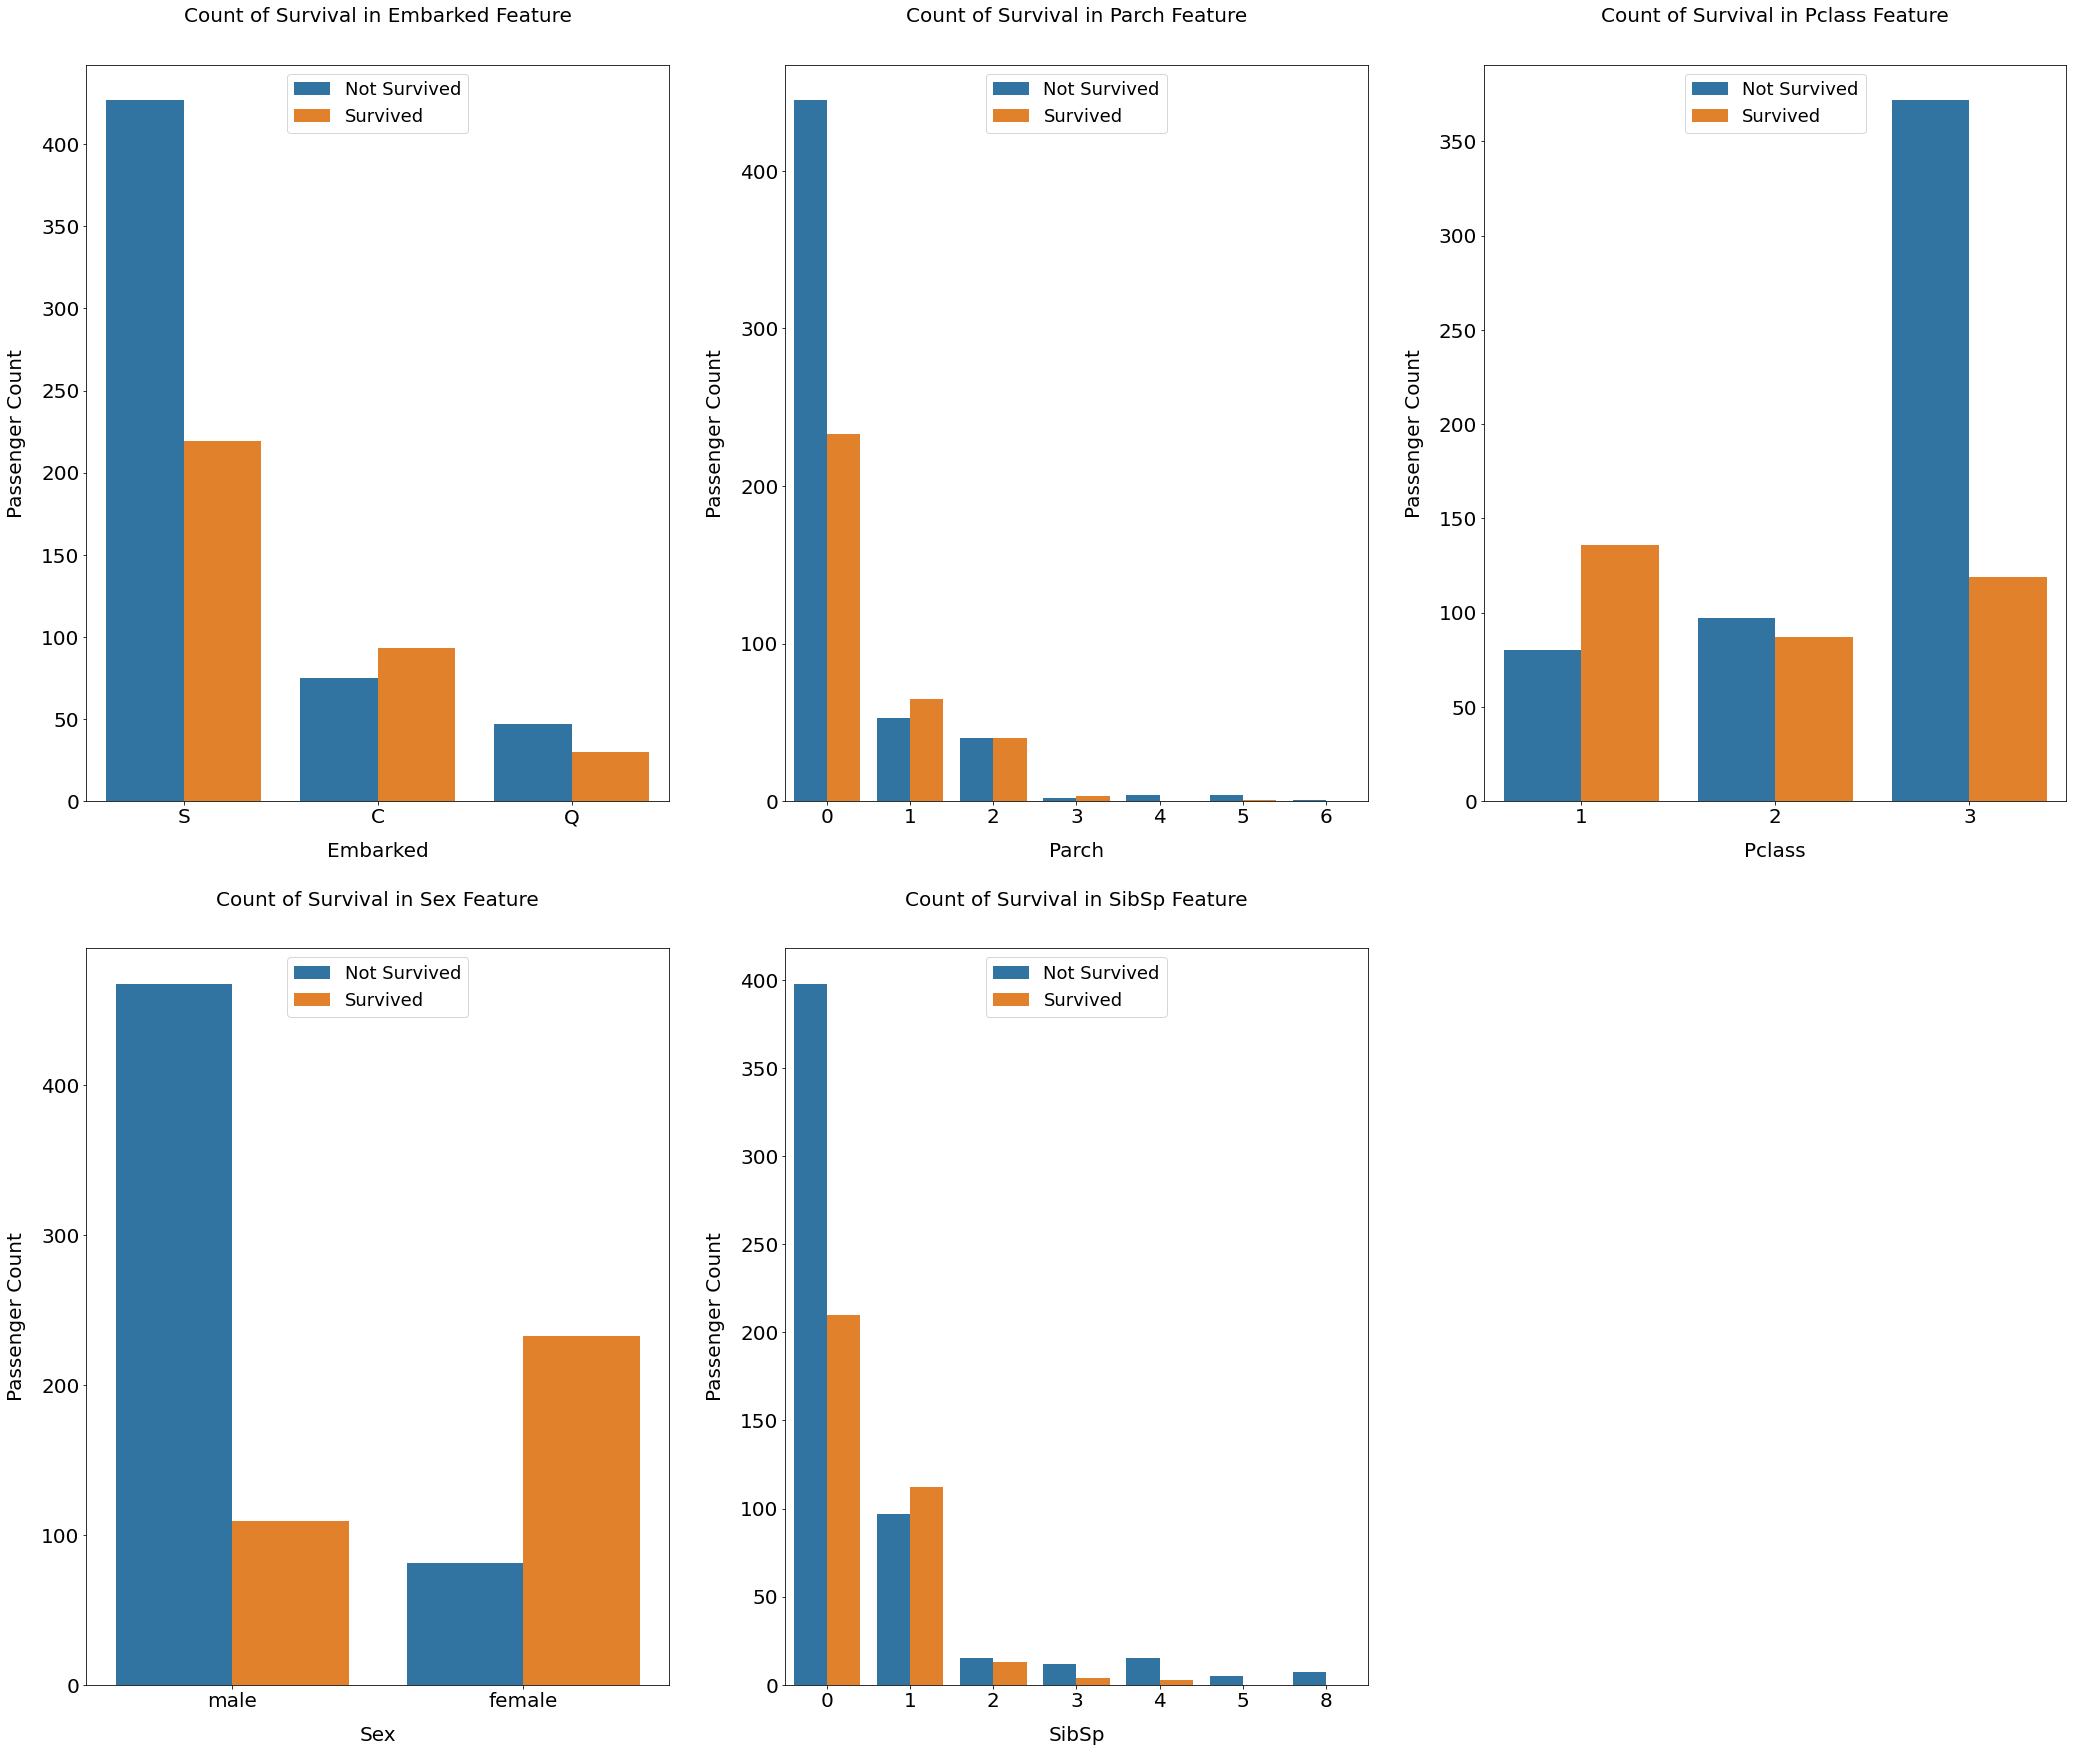

In [69]:
# Studie of Categorical Features plot with Target variable
columns_cat = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, col in enumerate(columns_cat, 1):    
    plt.subplot(2,3, i)
    sns.countplot(x=col, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(col), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(col), size=20, y=1.05)

plt.show()

C:\Users\Philippine\Documents\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Philippine\Documents\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


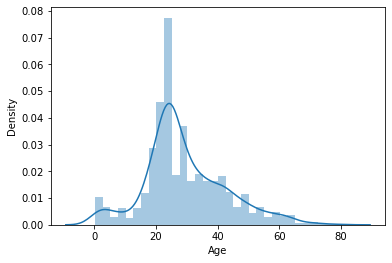

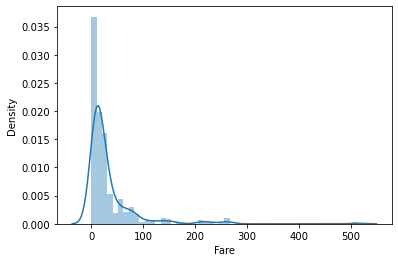

In [70]:
# Continuous Features plot with Target variable
# we saw that the distribution of fare is not gaussianne
# we will encode this columns to resolve the problem

columns_num = ['Age', 'Fare']

for col in columns_num :
    plt.figure()
    sns.distplot(df_all[col])

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

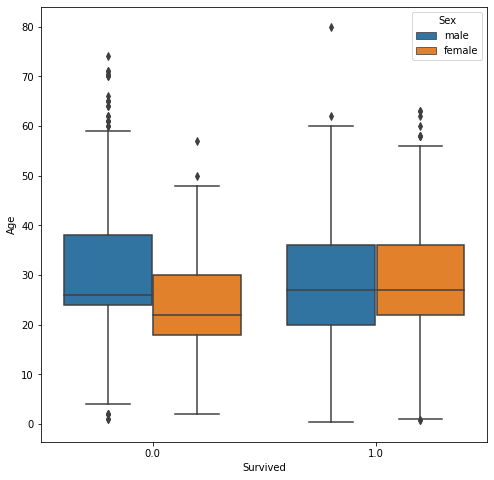

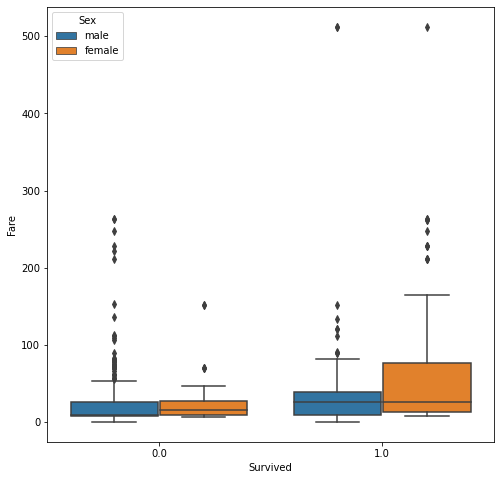

In [71]:
# check distribution of continuous features
plt.figure(figsize=(8, 8))
sns.boxplot(x='Survived', y='Age', data=df_train, hue='Sex')

plt.figure(figsize=(8, 8))
sns.boxplot(x='Survived', y='Fare', data=df_train, hue='Sex')

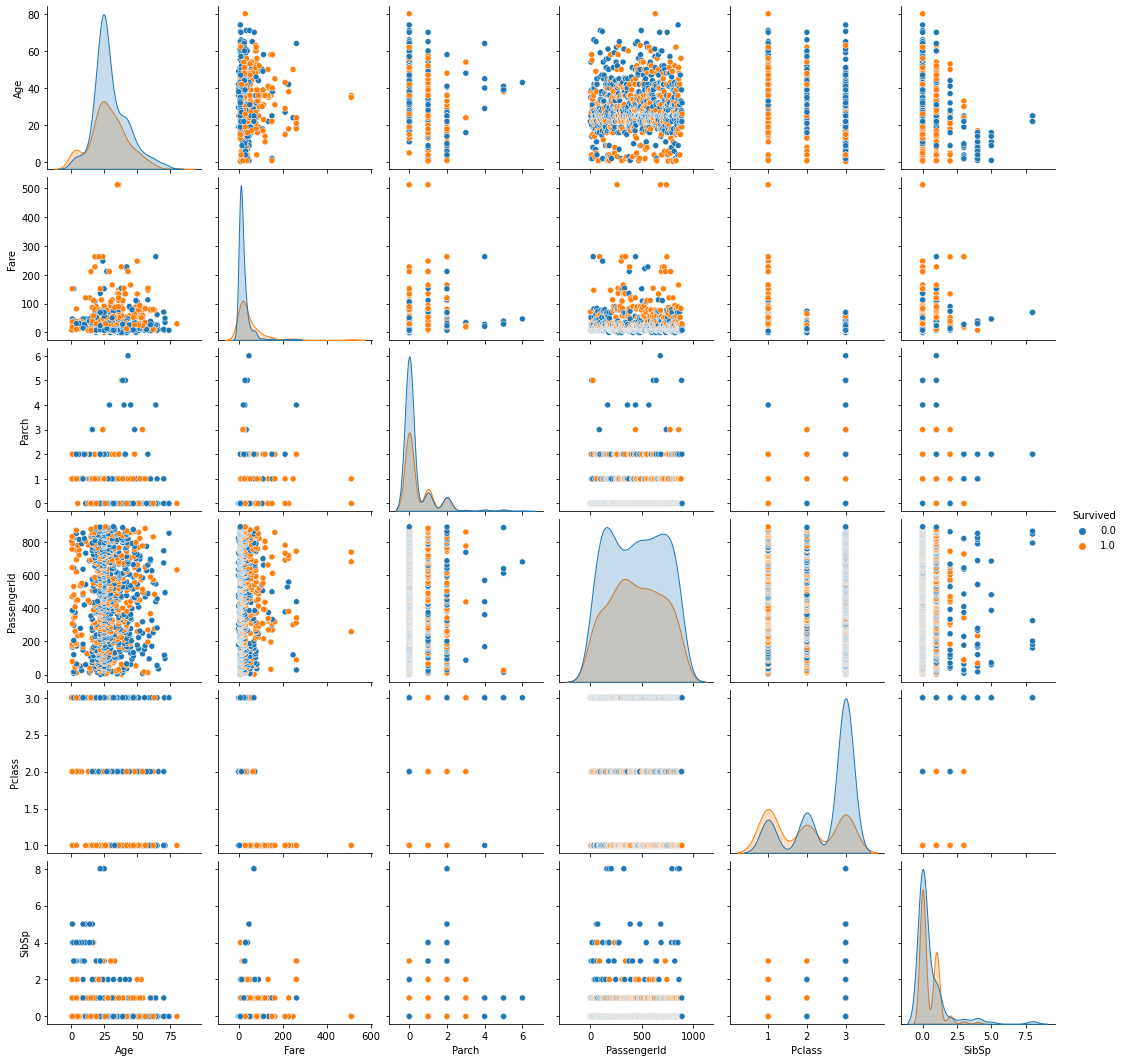

In [72]:
sns.pairplot(df_train, hue = 'Survived')

<AxesSubplot:>

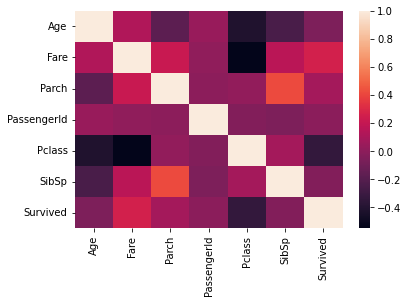

In [73]:
# check the correlation between all features
sns.heatmap(df_train.corr())

C:\Users\Philippine\Documents\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


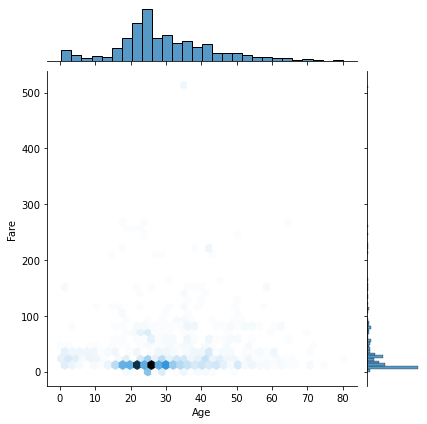

In [74]:
# check the correlation between age and fare
sns.jointplot('Age', 'Fare', data=df_train, kind='hex')

### conclusion

- During the treatment of the null values we removed 3 rows and the cabin column because it was almost empty
- As there was a lot of missing data "age" we assigned the median ages of each category
- there was no duplicate or null value to remove
- As we have little data for the training, we will try to reduce our number of variables to the minimum

### Creating new features

we want to regroup the SibSp and Parch feature in just one feature. We will try :
- number of familly menber on the boat
- is the passenger is alone (0 : No or 1 : Yes)

The correlation between IsAlone and Survived is bigger, that's why we will keep this one

In [75]:
df_all['NumberOfFamily'] = df_all.apply(lambda x: x['SibSp'] + x['Parch'] + 1, axis='columns')
#print(df_train[['NumberOfFamily', 'Survived']].groupby('NumberOfFamily', as_index=False)['Survived'].mean())

df_all['IsAlone'] = df_all.apply(lambda x: 1 if x['NumberOfFamily'] == 1 else 0, axis='columns')
#print(df_train[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False)['Survived'].mean())

<AxesSubplot:>

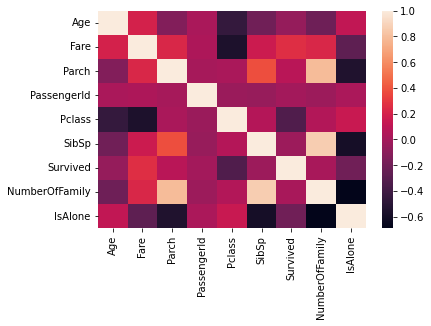

In [76]:
sns.heatmap(df_all.corr())

### Select columns

we will keep : 
- age (delete for a first time Fare, beacause it's really correlate with Age)
- sexe
- is alone
- Pclass
- Survived (target)
- dataset (train /test)

We will delete data not independent enough from an already stored data, or no sens data:
- embarked, Name, Ticket, PassengerId (no sens data)
- Parch, SibSb, NumberOfFamily. WE already keep 'is alone' (not enough independent)
- Fare (not enough independent)



In [77]:
df_all.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket', 'dataset', 'NumberOfFamily',
       'IsAlone'],
      dtype='object')

# Pre-processing data


In [78]:
columns_final = ['PassengerId','Age', 'Sex', 'IsAlone', 'Pclass', 'Survived', 'dataset']
df_all = df_all[columns_final]
df_all.shape

(1309, 7)

In [79]:
df_train, df_test = divide_df(df_all)

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))

print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))

print('Test X Shape = {}'.format(df_test.shape))

print(df_train.columns)
print(df_test.columns)

df_all.head()

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 7)
Training y Shape = 891

Test X Shape = (418, 6)
Index(['PassengerId', 'Age', 'Sex', 'IsAlone', 'Pclass', 'Survived',
       'dataset'],
      dtype='object')
Index(['PassengerId', 'Age', 'Sex', 'IsAlone', 'Pclass', 'dataset'], dtype='object')


,PassengerId,Age,Sex,IsAlone,Pclass,Survived,dataset
0,1,22.0,male,0,3,0.0,train
1,2,38.0,female,0,1,1.0,train
2,3,26.0,female,1,3,1.0,train
3,4,35.0,female,0,1,1.0,train
4,5,35.0,male,1,3,0.0,train


In [80]:
df_train.reset_index()

data_train = df_train[['Age', 'Sex', 'IsAlone', 'Pclass', 'Survived']].reset_index()
# scaling of the Age and Pclass
data_train['Age']=data_train['Age']/80
data_train['Pclass']=data_train['Pclass']/3

# encode Sex
data_train['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
print('dataset size :', data_train.shape)
data_train.head()

dataset size : (891, 6)


,index,Age,Sex,IsAlone,Pclass,Survived
0,0,0.2750,0,0,1.000000,0.0
1,1,0.4750,1,0,0.333333,1.0
2,2,0.3250,1,1,1.000000,1.0
3,3,0.4375,1,0,0.333333,1.0
4,4,0.4375,0,1,1.000000,0.0


In [81]:
df_test.reset_index()

data_test = df_test[['Age', 'Sex', 'IsAlone', 'Pclass']].reset_index()
data_test['Age']=data_test['Age']/80
data_test['Pclass']=data_test['Pclass']/3
data_test['Sex'].replace(['male', 'female'], [0, 1], inplace=True)

print('dataset size :', data_test.shape)
data_test.head()      

dataset size : (418, 5)


,index,Age,Sex,IsAlone,Pclass
0,891,0.43125,0,1,1.000000
1,892,0.58750,1,0,1.000000
2,893,0.77500,0,1,0.666667
3,894,0.33750,0,1,1.000000
4,895,0.27500,1,0,1.000000


In [82]:
from sklearn.model_selection import train_test_split

y_train = data_train['Survived']
X_train = data_train.drop(['Survived', 'index'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2)

X_test = data_test.drop(['index'], axis=1)

In [83]:
X_train.head()

,Age,Sex,IsAlone,Pclass
107,0.3125,0,1,1.000000
581,0.4875,1,0,0.333333
879,0.7000,1,0,0.333333
650,0.3125,0,1,1.000000
373,0.2750,0,1,0.333333


# Classification - models tests

In [84]:
def study_model(X_val, y_val, X_train, y_train, model):
    model.fit(X_train, y_train) # trainig of the modele
    model_score = model.score(X_val, y_val) # scoring
    y_pred = model.predict(X_val) #prediction
    model_report = classification_report(y_val, y_pred, target_names = ['0','1'])
    
    print("score model : ", model_score)
    print("report", model_report)
    return model_score, model_report, model

In [85]:
#data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
#pd.DataFrame.from_dict(data, orient='index')

# we create a list with all the optimizid classifer in order to select the best one
list_opt = []

## Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

# e xisting parameter 
random_forest = RandomForestClassifier(
    criterion='gini', 
    n_estimators=500,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=5,
    max_features='auto',
    oob_score=True,
    random_state=5,
    n_jobs=-1,
    verbose=1
)
#random_forest.fit(X_train, y_train)
#y_pred = random_forest.predict(X_test)
#acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
#acc_random_forest

model_score, model_report, rf = study_model(X_val, y_val, X_train, y_train, random_forest)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


In [97]:
liste_score = []
liste_n_estimators = [2,5,10,15,20,25,30,35,40,45,50,55,60,100,200,300,400,500]
liste_criterion = ["gini", "entropy"]
liste_random_state = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]

for n_estimators in liste_n_estimators:
#for criterion in liste_criterion:
#for rs in liste_random_state : 
    random_forest = RandomForestClassifier(
        criterion = "entropy", n_estimators=n_estimators,
        max_depth=10,min_samples_split=4,
        min_samples_leaf=5,max_features='auto',
        oob_score=True,random_state=5,
        n_jobs=-1,verbose=1
    )
    model_score, model_report, rf = study_model(X_val, y_val, X_train, y_train, random_forest)
    liste_score.append(model_score)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Philippine\Documents\ANACONDA\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


score model :  0.7262569832402235
report               precision    recall  f1-score   support

           0       0.77      0.77      0.77       106
           1       0.67      0.66      0.66        73

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179

score model :  0.7486033519553073
report               precision    recall  f1-score   support

           0       0.77      0.81      0.79       106
           1       0.71      0.66      0.68        73

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Philippine\Documents\ANACONDA\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent worke

score model :  0.776536312849162
report               precision    recall  f1-score   support

           0       0.78      0.86      0.82       106
           1       0.76      0.66      0.71        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.77       179



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.77      0.84      0.81       106
           1       0.73      0.64      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


score model :  0.7653631284916201
report               precision    recall  f1-score   support

           0       0.78      0.85      0.81       106
           1       0.75      0.64      0.69        73

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179



[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


score model :  0.7541899441340782
report               precision    recall  f1-score   support

           0       0.77      0.83      0.80       106
           1       0.72      0.64      0.68        73

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  35 out of  35 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  35 out of  35 | elapsed:    0.0s finished


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 ou

score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.0s finished


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  55 out of  55 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  55 out of  55 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


score model :  0.7541899441340782
report               precision    recall  f1-score   support

           0       0.78      0.82      0.80       106
           1       0.72      0.66      0.69        73

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    0.1s finished


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


Text(0, 0.5, 'Score')

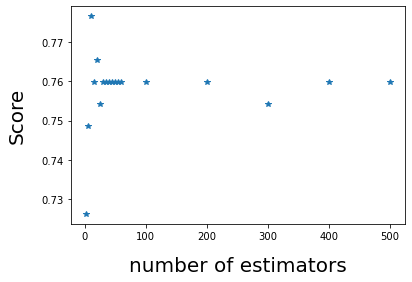

In [98]:
# the score is stabilize around 0.90 and 0.91.

plt.plot(liste_n_estimators, liste_score, '*')
plt.xlabel('number of estimators', size=20, labelpad=15)
plt.ylabel('Score', size=20, labelpad=15) 

In [99]:
liste_score = []
liste_n_estimators = [2,5,10,15,20,25,30,35,40,45,50,55,60,100,200,300,400,500]
liste_criterion = ["gini", "entropy"]
liste_random_state = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]

#for n_estimators in liste_n_estimators:
for criterion in liste_criterion:
#for rs in liste_random_state : 
    random_forest = RandomForestClassifier(
        criterion = criterion, n_estimators=300,
        max_depth=10,min_samples_split=4,
        min_samples_leaf=5,max_features='auto',
        oob_score=True,random_state=5,
        n_jobs=-1,verbose=1
    )
    model_score, model_report, rf = study_model(X_val, y_val, X_train, y_train, random_forest)
    liste_score.append(model_score)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


score model :  0.7541899441340782
report               precision    recall  f1-score   support

           0       0.78      0.82      0.80       106
           1       0.72      0.66      0.69        73

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


Text(0, 0.5, 'Score')

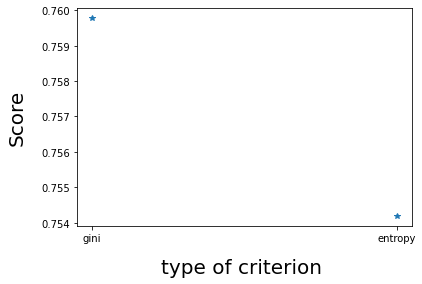

In [100]:
# we will propose to use "entropy"

plt.plot(liste_criterion, liste_score, '*')
plt.xlabel('type of criterion ', size=20, labelpad=15)
plt.ylabel('Score', size=20, labelpad=15) 

In [101]:
liste_score = []
liste_n_estimators = [2,5,10,15,20,25,30,35,40,45,50,55,60,100,200,300,400,500]
liste_criterion = ["gini", "entropy"]
liste_random_state = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]

#for n_estimators in liste_n_estimators:
#for criterion in liste_criterion:
for rs in liste_random_state : 
    random_forest = RandomForestClassifier(
        criterion = "entropy", n_estimators=300,
        max_depth=10,min_samples_split=4,
        min_samples_leaf=5,max_features='auto',
        oob_score=True,random_state=rs,
        n_jobs=-1,verbose=1
    )
    model_score, model_report, rf = study_model(X_val, y_val, X_train, y_train, random_forest)
    liste_score.append(model_score)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


score model :  0.7541899441340782
report               precision    recall  f1-score   support

           0       0.78      0.82      0.80       106
           1       0.72      0.66      0.69        73

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


score model :  0.7541899441340782
report               precision    recall  f1-score   support

           0       0.78      0.82      0.80       106
           1       0.72      0.66      0.69        73

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


score model :  0.7430167597765364
report               precision    recall  f1-score   support

           0       0.77      0.80      0.79       106
           1       0.70      0.66      0.68        73

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


score model :  0.7541899441340782
report               precision    recall  f1-score   support

           0       0.78      0.82      0.80       106
           1       0.72      0.66      0.69        73

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


score model :  0.7541899441340782
report               precision    recall  f1-score   support

           0       0.78      0.82      0.80       106
           1       0.72      0.66      0.69        73

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


score model :  0.7541899441340782
report               precision    recall  f1-score   support

           0       0.78      0.82      0.80       106
           1       0.72      0.66      0.69        73

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


score model :  0.7541899441340782
report               precision    recall  f1-score   support

           0       0.78      0.82      0.80       106
           1       0.72      0.66      0.69        73

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       106
           1       0.73      0.66      0.69        73

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


score model :  0.7430167597765364
report               precision    recall  f1-score   support

           0       0.77      0.80      0.79       106
           1       0.70      0.66      0.68        73

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


score model :  0.7541899441340782
report               precision    recall  f1-score   support

           0       0.78      0.82      0.80       106
           1       0.72      0.66      0.69        73

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


score model :  0.7597765363128491
report               precision    recall  f1-score   support

           0       0.78      0.82      0.80       106
           1       0.72      0.67      0.70        73

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


score model :  0.7541899441340782
report               precision    recall  f1-score   support

           0       0.78      0.82      0.80       106
           1       0.72      0.66      0.69        73

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


score model :  0.7541899441340782
report               precision    recall  f1-score   support

           0       0.78      0.82      0.80       106
           1       0.72      0.66      0.69        73

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


score model :  0.7541899441340782
report               precision    recall  f1-score   support

           0       0.78      0.82      0.80       106
           1       0.72      0.66      0.69        73

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


Text(0, 0.5, 'Score')

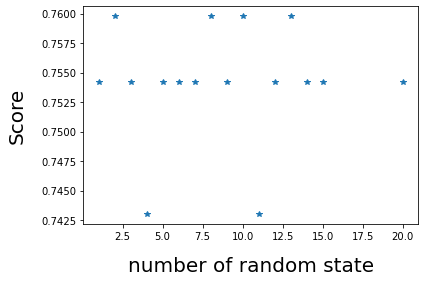

In [102]:
# with entropy, the number of random state are totally stable around 0.91

plt.plot(liste_random_state, liste_score, '*')
plt.xlabel('number of random state', size=20, labelpad=15)
plt.ylabel('Score', size=20, labelpad=15)

In [103]:
dico_RF = {}
dico_RF['Name'] = 'RandomForest'
dico_RF['Score']= model_score
dico_RF['Model']= rf

list_opt.append(dico_RF)